In [1]:
%matplotlib inline


# Colorbar


Use `~.figure.Figure.colorbar` by specifying the mappable object (here
the `~.matplotlib.image.AxesImage` returned by `~.axes.Axes.imshow`)
and the axes to attach the colorbar to.


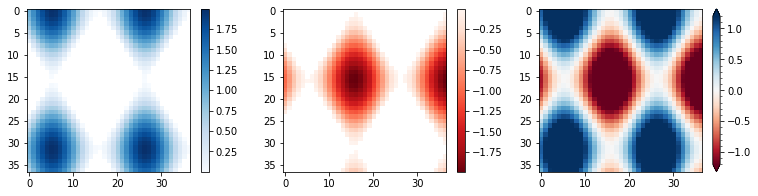

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# setup some generic data
N = 37
x, y = np.mgrid[:N, :N]
Z = (np.cos(x*0.2) + np.sin(y*0.3))

# mask out the negative and positive values, respectively
Zpos = np.ma.masked_less(Z, 0)
Zneg = np.ma.masked_greater(Z, 0)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos = ax1.imshow(Zpos, cmap='Blues', interpolation='none')

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax1)

# repeat everything above for the negative data
neg = ax2.imshow(Zneg, cmap='Reds_r', interpolation='none')
fig.colorbar(neg, ax=ax2)

# Plot both positive and negative values between +/- 1.2
pos_neg_clipped = ax3.imshow(Z, cmap='RdBu', vmin=-1.2, vmax=1.2,
                             interpolation='none')
# Add minorticks on the colorbar to make it easy to read the
# values off the colorbar.
cbar = fig.colorbar(pos_neg_clipped, ax=ax3, extend='both')
cbar.minorticks_on()
plt.show()

------------

References
""""""""""

The use of the following functions, methods, classes and modules is shown
in this example:



In [3]:
import matplotlib
import matplotlib.colorbar
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.figure.Figure.colorbar
matplotlib.pyplot.colorbar
matplotlib.colorbar.Colorbar.minorticks_on
matplotlib.colorbar.Colorbar.minorticks_off

<function matplotlib.colorbar.ColorbarBase.minorticks_off(self)>

# Color map tutorial 

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
print(viridis)

In [2]:
print(viridis(0.56))

(0.119512, 0.607464, 0.540218, 1.0)


In [3]:
print('viridis.colors', viridis.colors)
print('viridis(range(12))', viridis(range(12)))
print('viridis(np.linspace(0, 1, 12))', viridis(np.linspace(0, 1, 12)))

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 12

In [4]:
print('viridis(np.linspace(0, 1, 15))', viridis(np.linspace(0, 1, 15)))

viridis(np.linspace(0, 1, 15)) [[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


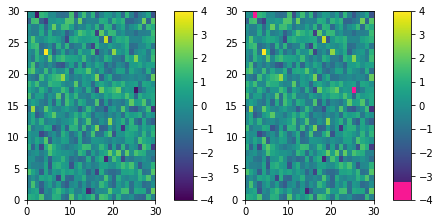

In [5]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

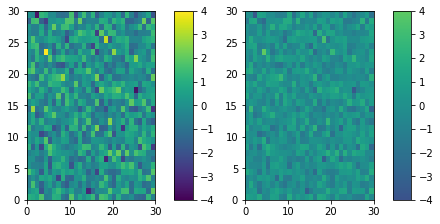

In [6]:
viridisBig = cm.get_cmap('viridis', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
plot_examples([viridis, newcmp])

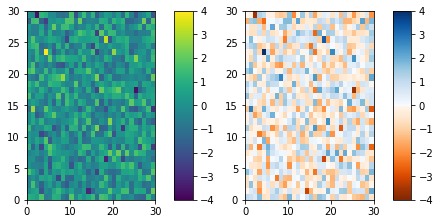

In [7]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])

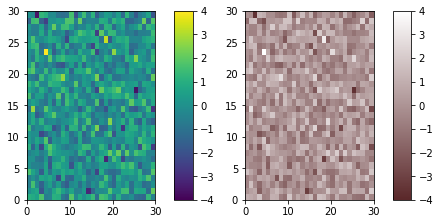

In [8]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N)
vals[:, 1] = np.linspace(39/256, 1, N)
vals[:, 2] = np.linspace(41/256, 1, N)
newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])

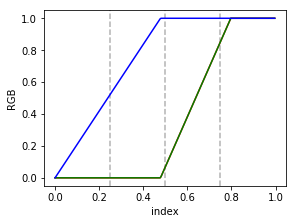

In [9]:
cdict = {'red':   [[0.0,  0.0, 0.0],
                   [0.48,  0.0, 0.0],
                   [0.8, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.48, 0.0, 0.0],
                   [0.8, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.48,  1.0, 1.0],
                   [0.8, 1.0, 1.0],
                   [1.0,  1.0, 1.0]]}


def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, color='0.7', linestyle='--')
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('index')
    ax.set_ylabel('RGB')
    plt.show()

plot_linearmap(cdict)


black_blue_white1 = LinearSegmentedColormap('BlackBlueWhite', cdict)
plt.register_cmap(cmap=black_blue_white1)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

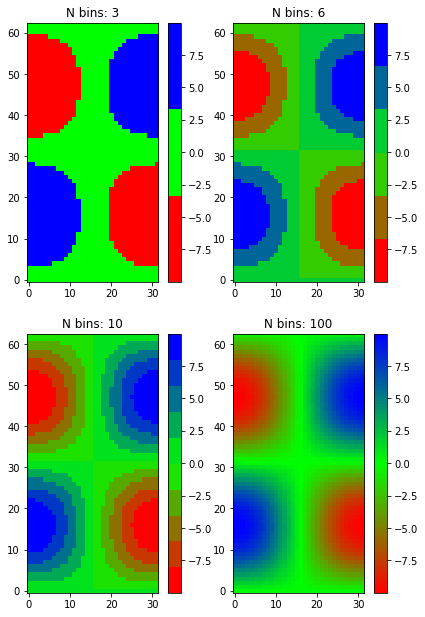

In [11]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)

In [17]:
# cdict1 = {'red':   ((0.0, 0.0, 0.0),
#                    (0.5, 0.0, 0.1),
#                    (1.0, 1.0, 1.0)),

#          'green': ((0.0, 0.0, 0.0),
#                    (1.0, 0.0, 0.0)),

#          'blue':  ((0.0, 0.0, 1.0),
#                    (0.5, 0.1, 0.0),
#                    (1.0, 0.0, 0.0))
#         }

cdict1 = {'red':   [[0.0,  0.0, 0.0],
                   [0.6,  0.0, 0.0],
                   [0.85, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'green': [[0.0,  0.0, 0.0],
                   [0.6, 0.0, 0.0],
                   [0.85, 1.0, 1.0],
                   [1.0,  1.0, 1.0]],
         'blue':  [[0.0,  0.0, 0.0],
                   [0.6,  1.0, 1.0],
                   [0.85, 1.0, 1.0],
                   [1.0,  1.0, 1.0]]}


cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 1.0),
                   (1.0, 0.1, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.1),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict3 = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = {**cdict3,
          'alpha': ((0.0, 1.0, 1.0),
                #   (0.25,1.0, 1.0),
                    (0.5, 0.3, 0.3),
                #   (0.75,1.0, 1.0),
                    (1.0, 1.0, 1.0)),
          }

In [18]:
blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

In [19]:
blue_red2 = LinearSegmentedColormap('BlueRed2', cdict2)
plt.register_cmap(cmap=blue_red2)

In [20]:
plt.register_cmap(name='BlueRed3', data=cdict3)  # optional lut kwarg
plt.register_cmap(name='BlueRedAlpha', data=cdict4)

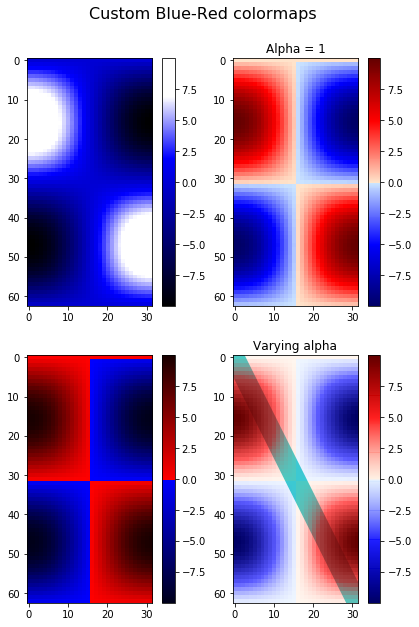

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Make 4 subplots:

im1 = axs[0, 0].imshow(Z, interpolation='nearest', cmap=blue_red1)
fig.colorbar(im1, ax=axs[0, 0])

cmap = plt.get_cmap('BlueRed2')
im2 = axs[1, 0].imshow(Z, interpolation='nearest', cmap=cmap)
fig.colorbar(im2, ax=axs[1, 0])

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this;
# it is done here just to illustrate the method.

plt.rcParams['image.cmap'] = 'BlueRed3'

im3 = axs[0, 1].imshow(Z, interpolation='nearest')
fig.colorbar(im3, ax=axs[0, 1])
axs[0, 1].set_title("Alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
#

# Draw a line with low zorder so it will be behind the image.
axs[1, 1].plot([0, 10 * np.pi], [0, 20 * np.pi], color='c', lw=20, zorder=-1)

im4 = axs[1, 1].imshow(Z, interpolation='nearest')
fig.colorbar(im4, ax=axs[1, 1])

# Here it is: changing the colormap for the current image and its
# colorbar after they have been plotted.
im4.set_cmap('BlueRedAlpha')
axs[1, 1].set_title("Varying alpha")
#

fig.suptitle('Custom Blue-Red colormaps', fontsize=16)
fig.subplots_adjust(top=0.9)

plt.show()